In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('fraud_oracle.csv')
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [6]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [8]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [3]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from supervised.automl import AutoML # mljar-supervised

In [9]:
X = df.drop('FraudFound_P', axis=1)
y = df.FraudFound_P

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [80]:
# train models with AutoML
automl = AutoML(mode="Explain")
automl.fit(X_train, y_train)

# compute the MSE on test data
predictions = automl.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))

Linear algorithm was disabled.
AutoML directory: AutoML_4
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline logloss 0.224564 trained in 0.92 seconds
2_DecisionTree logloss 0.18498 trained in 2.66 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 0.120595 trained in 5.19 seconds
4_Default_NeuralNetwork logloss 0.200724 trained in 3.15 seconds
5_Default_RandomForest logloss 0.179584 trained in 3.61 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.120595 trained in 0.45 seconds
AutoML fit time: 20.83 seconds
AutoML best model: 3_Default_Xgboost
Test MSE: 0.051361867704280154


In [95]:
accuracy_score(y_test, predictions["label"])

0.9486381322957198

In [21]:
automl.get_params()

{'algorithms': 'auto',
 'boost_on_errors': 'auto',
 'eval_metric': 'auto',
 'explain_level': 'auto',
 'features_selection': 'auto',
 'golden_features': 'auto',
 'hill_climbing_steps': 'auto',
 'kmeans_features': 'auto',
 'max_single_prediction_time': None,
 'mix_encoding': 'auto',
 'ml_task': 'auto',
 'mode': 'Explain',
 'model_time_limit': None,
 'n_jobs': -1,
 'optuna_init_params': {},
 'optuna_time_budget': None,
 'optuna_verbose': True,
 'random_state': 1234,
 'results_path': None,
 'stack_models': 'auto',
 'start_random_models': 'auto',
 'top_models_to_improve': 'auto',
 'total_time_limit': 3600,
 'train_ensemble': True,
 'validation_strategy': 'auto',
 'verbose': 1}

In [48]:
automl.get_stacked_data(predictions)

array([1, 0, 0, ..., 0, 0, 0])

In [51]:
automl.can_we_stack_them(predictions)

True

In [70]:
automl.predict_proba(X_test)

array([[4.4092393e-01, 5.5907607e-01],
       [9.9898589e-01, 1.0141303e-03],
       [9.4028711e-01, 5.9712861e-02],
       ...,
       [9.8459023e-01, 1.5409785e-02],
       [9.3774062e-01, 6.2259369e-02],
       [9.9976903e-01, 2.3099447e-04]], dtype=float32)

In [97]:
a = automl.predict_proba(X_test)
a

array([[4.4092393e-01, 5.5907607e-01],
       [9.9898589e-01, 1.0141303e-03],
       [9.4028711e-01, 5.9712861e-02],
       ...,
       [9.8459023e-01, 1.5409785e-02],
       [9.3774062e-01, 6.2259369e-02],
       [9.9976903e-01, 2.3099447e-04]], dtype=float32)

In [100]:
predictions.pad()

,prediction_0,prediction_1,label
0,0.440924,0.559076,1
1,0.998986,0.001014,0
2,0.940287,0.059713,0
3,0.999630,0.000370,0
4,0.700616,0.299384,1
...,...,...,...
3850,0.869662,0.130338,0
3851,0.999894,0.000106,0
3852,0.984590,0.015410,0
3853,0.937741,0.062259,0


In [118]:
predictions.axes

[RangeIndex(start=0, stop=3855, step=1),
 Index(['prediction_0', 'prediction_1', 'label'], dtype='object')]

<AxesSubplot:>

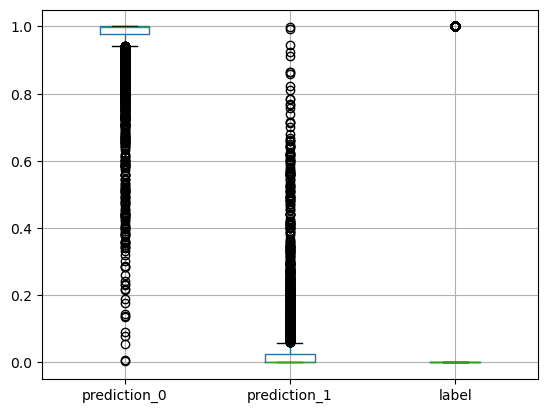

In [123]:
predictions.boxplot()

In [133]:
predictions.corr()

,prediction_0,prediction_1,label
prediction_0,1.000000,-1.000000,-0.852885
prediction_1,-1.000000,1.000000,0.852885
label,-0.852885,0.852885,1.000000


In [141]:
predictions.cummax()

,prediction_0,prediction_1,label
0,0.440924,0.559076,1
1,0.998986,0.559076,1
2,0.998986,0.559076,1
3,0.999630,0.559076,1
4,0.999630,0.559076,1
...,...,...,...
3850,0.999996,0.997161,1
3851,0.999996,0.997161,1
3852,0.999996,0.997161,1
3853,0.999996,0.997161,1


In [143]:
predictions.cummin()

,prediction_0,prediction_1,label
0,0.440924,0.559076,1
1,0.440924,0.001014,0
2,0.440924,0.001014,0
3,0.440924,0.000370,0
4,0.440924,0.000370,0
...,...,...,...
3850,0.002839,0.000004,0
3851,0.002839,0.000004,0
3852,0.002839,0.000004,0
3853,0.002839,0.000004,0


In [148]:
predictions.describe()

,prediction_0,prediction_1,label
count,3855.000000,3855.000000,3855.000000
mean,0.955930,0.044073,0.049027
std,0.113312,0.113312,0.215953
min,0.002839,0.000004,0.000000
25%,0.976280,0.000248,0.000000
50%,0.997856,0.002144,0.000000
75%,0.999752,0.023720,0.000000
max,0.999996,0.997161,1.000000


In [166]:
predictions

,prediction_0,prediction_1,label
0,0.440924,0.559076,1
1,0.998986,0.001014,0
2,0.940287,0.059713,0
3,0.999630,0.000370,0
4,0.700616,0.299384,1
...,...,...,...
3850,0.869662,0.130338,0
3851,0.999894,0.000106,0
3852,0.984590,0.015410,0
3853,0.937741,0.062259,0


In [171]:
predictions[['prediction_1', 'label']]

,prediction_1,label
0,0.559076,1
1,0.001014,0
2,0.059713,0
3,0.000370,0
4,0.299384,1
...,...,...
3850,0.130338,0
3851,0.000106,0
3852,0.015410,0
3853,0.062259,0


In [172]:
ones = predictions['label'] == 1
ones

0        True
1       False
2       False
3       False
4        True
        ...  
3850    False
3851    False
3852    False
3853    False
3854    False
Name: label, Length: 3855, dtype: bool

In [173]:
ones = [predictions['label'] == 1]
ones

[0        True
 1       False
 2       False
 3       False
 4        True
         ...  
 3850    False
 3851    False
 3852    False
 3853    False
 3854    False
 Name: label, Length: 3855, dtype: bool]

In [45]:
ddd = automl.get_leaderboard()

In [46]:
ddd

,name,model_type,metric_type,metric_value,train_time
0,1_Baseline,Baseline,logloss,0.224564,0.89
1,2_DecisionTree,Decision Tree,logloss,0.184980,11.66
2,3_Default_Xgboost,Xgboost,logloss,0.120595,5.60
3,4_Default_NeuralNetwork,Neural Network,logloss,0.200724,3.12
4,5_Default_RandomForest,Random Forest,logloss,0.179584,4.08
5,Ensemble,Ensemble,logloss,0.120595,0.47


In [25]:
predictions.std()

0.21592491137317096

In [ ]:
predictions.

In [85]:
# train models with AutoML
automl_2 = AutoML(mode="Explain")
automl_2.fit(X_train, y_train)

# compute the MSE on test data
predictions2 = automl_2.predict_all(X_test)
print(predictions.head())
print("Test accuracy:", accuracy_score(y_test, predictions2["label"].astype(int)))

Linear algorithm was disabled.
AutoML directory: AutoML_8
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline logloss 0.224564 trained in 0.86 seconds
2_DecisionTree logloss 0.18498 trained in 2.62 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 0.120595 trained in 5.36 seconds
4_Default_NeuralNetwork logloss 0.200724 trained in 2.87 seconds
5_Default_RandomForest logloss 0.179584 trained in 3.68 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.120595 trained in 0.45 seconds
AutoML fit time: 20.61 seconds
AutoML best model: 3_Default_Xgboost
   prediction_0  prediction_1  label
0      0.440924      0.559076      1
1      0.9989

In [88]:
accuracy_score(y_test, predictions2["label"])

0.9486381322957198

In [96]:
from sklearn.metrics import zero_one_loss

zero_one_loss(y_test, predictions2["label"])

0.051361867704280195

In [91]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, predictions2["label"])

0.36942675159235666

In [90]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, predictions2["label"])

0.7305642877973395

In [93]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, predictions2["label"])

0.3278435426747421

In [91]:
# Importing necassary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import average_precision_score
%matplotlib inline

In [3]:
df = pd.read_csv('fraud_oracle.csv')
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [4]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head()

,month,weekofmonth,dayofweek,make,accidentarea,dayofweekclaimed,monthclaimed,weekofmonthclaimed,sex,maritalstatus,...,ageofvehicle,ageofpolicyholder,policereportfiled,witnesspresent,agenttype,numberofsuppliments,addresschange_claim,numberofcars,year,basepolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [7]:
numerical = df.select_dtypes(include= np.number)
numerical

,weekofmonth,weekofmonthclaimed,age,fraudfound_p,policynumber,repnumber,deductible,driverrating,year
0,5,1,21,0,1,12,300,1,1994
1,3,4,34,0,2,15,400,4,1994
2,5,2,47,0,3,7,400,3,1994
3,2,1,65,0,4,4,400,2,1994
4,5,2,27,0,5,3,400,1,1994
...,...,...,...,...,...,...,...,...,...
15415,4,5,35,1,15416,5,400,4,1996
15416,5,1,30,0,15417,11,400,3,1996
15417,5,1,24,1,15418,4,400,4,1996
15418,1,2,34,0,15419,6,400,4,1996


In [8]:
categorical = df.select_dtypes(include= object)
categorical

,month,dayofweek,make,accidentarea,dayofweekclaimed,monthclaimed,sex,maritalstatus,fault,policytype,...,pastnumberofclaims,ageofvehicle,ageofpolicyholder,policereportfiled,witnesspresent,agenttype,numberofsuppliments,addresschange_claim,numberofcars,basepolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Friday,Toyota,Urban,Tuesday,Nov,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,Nov,Thursday,Pontiac,Urban,Friday,Dec,Male,Married,Policy Holder,Sedan - Liability,...,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,Nov,Thursday,Toyota,Rural,Friday,Dec,Male,Single,Policy Holder,Sedan - Collision,...,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,Dec,Monday,Toyota,Urban,Thursday,Dec,Female,Married,Third Party,Sedan - All Perils,...,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


In [9]:
categorical_encoded = categorical
categorical_encoded

,month,dayofweek,make,accidentarea,dayofweekclaimed,monthclaimed,sex,maritalstatus,fault,policytype,...,pastnumberofclaims,ageofvehicle,ageofpolicyholder,policereportfiled,witnesspresent,agenttype,numberofsuppliments,addresschange_claim,numberofcars,basepolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Friday,Toyota,Urban,Tuesday,Nov,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,Nov,Thursday,Pontiac,Urban,Friday,Dec,Male,Married,Policy Holder,Sedan - Liability,...,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,Nov,Thursday,Toyota,Rural,Friday,Dec,Male,Single,Policy Holder,Sedan - Collision,...,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,Dec,Monday,Toyota,Urban,Thursday,Dec,Female,Married,Third Party,Sedan - All Perils,...,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


### Data Cleaning

In [10]:
#month

categorical_encoded['month'].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
       'Jul', 'May', 'Sep'], dtype=object)

In [11]:
months = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

categorical_encoded['month'] = categorical_encoded['month'].replace(months)

In [12]:
#days

days = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

categorical_encoded['dayofweek'] = categorical_encoded['dayofweek'].replace(days)

In [13]:
#make

categorical_encoded['make'] = categorical_encoded['make'].astype('category')
categorical_encoded['make'] = categorical_encoded['make'].cat.codes

In [14]:
# accidentarea

categorical_encoded['accidentarea'] = categorical_encoded['accidentarea'].astype('category')
categorical_encoded['accidentarea'] = categorical_encoded['accidentarea'].cat.codes

In [15]:
#dayofweekclaimed

categorical_encoded['dayofweekclaimed'] = categorical_encoded['dayofweekclaimed'].replace(days)

In [16]:
#monthclaimed

categorical_encoded['monthclaimed'] = categorical_encoded['monthclaimed'].replace(months)

In [17]:
#sex

categorical_encoded['sex'] = categorical_encoded['sex'].replace({'Female':1,'Male':2})

In [18]:
#maritalstatus

categorical_encoded['maritalstatus'] = categorical_encoded['maritalstatus'].astype('category')
categorical_encoded['maritalstatus'] = categorical_encoded['maritalstatus'].cat.codes

In [19]:
#fault

categorical_encoded['fault'] = categorical_encoded['fault'].replace({'Policy Holder':1, 'Third Party':2})

In [20]:
#policytype

categorical_encoded['policytype'] = categorical_encoded['policytype'].astype('category')
categorical_encoded['policytype'] = categorical_encoded['policytype'].cat.codes

In [21]:
#pastnumbersofclaims

categorical_encoded['pastnumberofclaims'] = categorical_encoded['pastnumberofclaims'].astype('category')
categorical_encoded['pastnumberofclaims'] = categorical_encoded['pastnumberofclaims'].cat.codes

In [22]:
#ageofvehicle

categorical_encoded['ageofvehicle'] = categorical_encoded['ageofvehicle'].astype('category')
categorical_encoded['ageofvehicle'] = categorical_encoded['ageofvehicle'].cat.codes

In [23]:
categorical_encoded['ageofpolicyholder'] = categorical_encoded['ageofpolicyholder'].astype('category')
categorical_encoded['ageofpolicyholder'] = categorical_encoded['ageofpolicyholder'].cat.codes

In [24]:
#policereportfiled

categorical_encoded['policereportfiled'] = categorical_encoded['policereportfiled'].replace({'No':0,'Yes':1})

In [25]:
#witnesspresent

categorical_encoded['witnesspresent'] = categorical_encoded['witnesspresent'].replace({'No':0,'Yes':1})

In [26]:
#agenttype

categorical_encoded['agenttype'] = categorical_encoded['agenttype'].replace({'External':1,'Internal':2})

In [27]:
#numberofsuppliments

categorical_encoded['numberofsuppliments'] = categorical_encoded['numberofsuppliments'].astype('category')
categorical_encoded['numberofsuppliments'] = categorical_encoded['numberofsuppliments'].cat.codes

In [28]:
#addresschange_claim

categorical_encoded['addresschange_claim'] = categorical_encoded['addresschange_claim'].astype('category')
categorical_encoded['addresschange_claim'] = categorical_encoded['addresschange_claim'].cat.codes

In [29]:
#numberofcars

categorical_encoded['numberofcars'] = categorical_encoded['numberofcars'].astype('category')
categorical_encoded['numberofcars'] = categorical_encoded['numberofcars'].cat.codes

In [30]:
#basepolicy

categorical_encoded['basepolicy'] = categorical_encoded['basepolicy'].astype('category')
categorical_encoded['basepolicy'] = categorical_encoded['basepolicy'].cat.codes

In [31]:
#vehiclecategory

categorical_encoded['vehiclecategory'] = categorical_encoded['vehiclecategory'].astype('category')
categorical_encoded['vehiclecategory'] = categorical_encoded['vehiclecategory'].cat.codes

In [32]:
numerical.head()

,weekofmonth,weekofmonthclaimed,age,fraudfound_p,policynumber,repnumber,deductible,driverrating,year
0,5,1,21,0,1,12,300,1,1994
1,3,4,34,0,2,15,400,4,1994
2,5,2,47,0,3,7,400,3,1994
3,2,1,65,0,4,4,400,2,1994
4,5,2,27,0,5,3,400,1,1994


In [33]:
categorical_encoded.head()

,month,dayofweek,make,accidentarea,dayofweekclaimed,monthclaimed,sex,maritalstatus,fault,policytype,...,pastnumberofclaims,ageofvehicle,ageofpolicyholder,policereportfiled,witnesspresent,agenttype,numberofsuppliments,addresschange_claim,numberofcars,basepolicy
0,12,3,6,1,2,1,1,2,1,5,...,3,1,3,0,0,1,3,0,2,2
1,1,3,6,1,1,1,2,2,1,4,...,3,4,4,1,0,1,3,3,0,1
2,10,5,6,1,4,11,2,1,1,4,...,0,5,6,0,0,1,3,3,0,1
3,6,6,17,0,5,7,2,1,2,2,...,0,6,7,1,0,1,2,3,0,2
4,1,1,6,1,2,2,1,2,2,4,...,3,3,4,0,0,1,3,3,0,1


In [34]:
full_df = pd.concat([numerical,categorical_encoded], axis=1)

In [35]:
full_df

,weekofmonth,weekofmonthclaimed,age,fraudfound_p,policynumber,repnumber,deductible,driverrating,year,month,...,pastnumberofclaims,ageofvehicle,ageofpolicyholder,policereportfiled,witnesspresent,agenttype,numberofsuppliments,addresschange_claim,numberofcars,basepolicy
0,5,1,21,0,1,12,300,1,1994,12,...,3,1,3,0,0,1,3,0,2,2
1,3,4,34,0,2,15,400,4,1994,1,...,3,4,4,1,0,1,3,3,0,1
2,5,2,47,0,3,7,400,3,1994,10,...,0,5,6,0,0,1,3,3,0,1
3,2,1,65,0,4,4,400,2,1994,6,...,0,6,7,1,0,1,2,3,0,2
4,5,2,27,0,5,3,400,1,1994,1,...,3,3,4,0,0,1,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,5,35,1,15416,5,400,4,1996,11,...,1,4,4,0,0,1,3,3,0,1
15416,5,1,30,0,15417,11,400,3,1996,11,...,2,4,4,0,0,1,2,3,2,2
15417,5,1,24,1,15418,4,400,4,1996,11,...,2,3,3,0,0,1,0,3,0,1
15418,1,2,34,0,15419,6,400,4,1996,12,...,3,0,4,0,0,1,2,3,0,0


In [36]:
full_df = full_df.drop(['policynumber','year'], axis=1)

In [37]:
full_df

,weekofmonth,weekofmonthclaimed,age,fraudfound_p,repnumber,deductible,driverrating,month,dayofweek,make,...,pastnumberofclaims,ageofvehicle,ageofpolicyholder,policereportfiled,witnesspresent,agenttype,numberofsuppliments,addresschange_claim,numberofcars,basepolicy
0,5,1,21,0,12,300,1,12,3,6,...,3,1,3,0,0,1,3,0,2,2
1,3,4,34,0,15,400,4,1,3,6,...,3,4,4,1,0,1,3,3,0,1
2,5,2,47,0,7,400,3,10,5,6,...,0,5,6,0,0,1,3,3,0,1
3,2,1,65,0,4,400,2,6,6,17,...,0,6,7,1,0,1,2,3,0,2
4,5,2,27,0,3,400,1,1,1,6,...,3,3,4,0,0,1,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,5,35,1,5,400,4,11,5,17,...,1,4,4,0,0,1,3,3,0,1
15416,5,1,30,0,11,400,3,11,4,13,...,2,4,4,0,0,1,2,3,2,2
15417,5,1,24,1,4,400,4,11,4,17,...,2,3,3,0,0,1,0,3,0,1
15418,1,2,34,0,6,400,4,12,1,17,...,3,0,4,0,0,1,2,3,0,0


In [38]:
full_df.dtypes

weekofmonth              int64
weekofmonthclaimed       int64
age                      int64
fraudfound_p             int64
repnumber                int64
deductible               int64
driverrating             int64
month                    int64
dayofweek                int64
make                      int8
accidentarea              int8
dayofweekclaimed        object
monthclaimed            object
sex                      int64
maritalstatus             int8
fault                    int64
policytype                int8
vehiclecategory           int8
vehicleprice            object
days_policy_accident    object
days_policy_claim       object
pastnumberofclaims        int8
ageofvehicle              int8
ageofpolicyholder         int8
policereportfiled        int64
witnesspresent           int64
agenttype                int64
numberofsuppliments       int8
addresschange_claim       int8
numberofcars              int8
basepolicy                int8
dtype: object

In [52]:
full_df['vehicleprice'] = full_df['vehicleprice'].astype('category')
full_df['vehicleprice'] = full_df['vehicleprice'].cat.codes

In [63]:
full_df['days_policy_accident'] = full_df['days_policy_accident'].astype('category')
full_df['days_policy_accident'] = full_df['days_policy_accident'].cat.codes

In [68]:
full_df['days_policy_claim'] = full_df['days_policy_claim'].astype('category')
full_df['days_policy_claim'] = full_df['days_policy_claim'].cat.codes

In [54]:
# X Y split

In [69]:
X = full_df.drop('fraudfound_p', axis=1)
y = full_df.fraudfound_p

array([[<AxesSubplot:title={'center':'weekofmonth'}>,
        <AxesSubplot:title={'center':'weekofmonthclaimed'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'repnumber'}>,
        <AxesSubplot:title={'center':'deductible'}>],
       [<AxesSubplot:title={'center':'driverrating'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'dayofweek'}>,
        <AxesSubplot:title={'center':'make'}>,
        <AxesSubplot:title={'center':'accidentarea'}>],
       [<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'maritalstatus'}>,
        <AxesSubplot:title={'center':'fault'}>,
        <AxesSubplot:title={'center':'policytype'}>,
        <AxesSubplot:title={'center':'vehiclecategory'}>],
       [<AxesSubplot:title={'center':'pastnumberofclaims'}>,
        <AxesSubplot:title={'center':'ageofvehicle'}>,
        <AxesSubplot:title={'center':'ageofpolicyholder'}>,
        <AxesSubplot:title={'center':

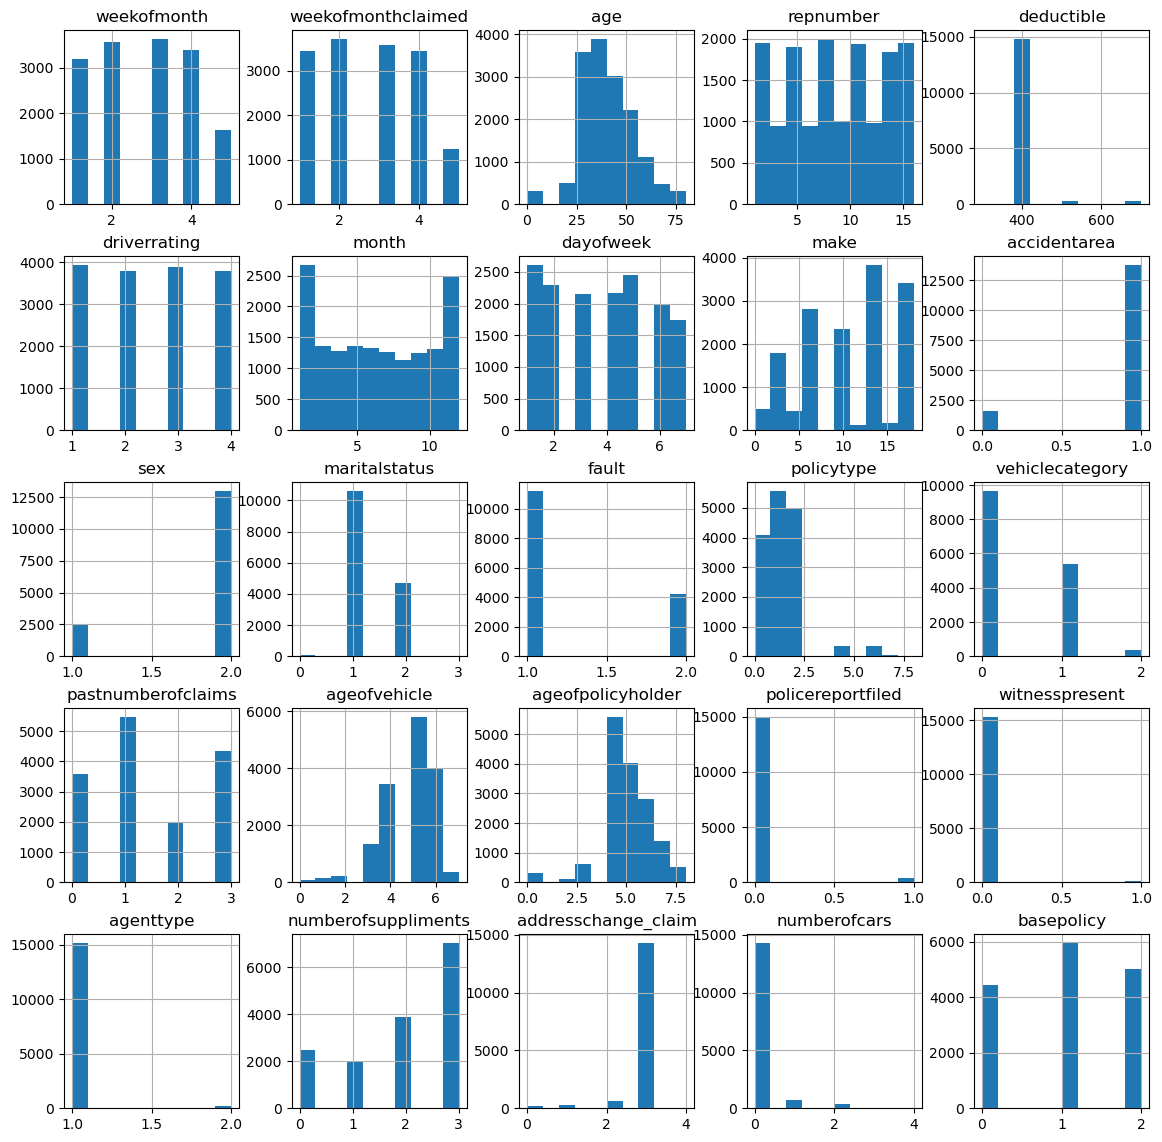

In [47]:
## histogram Visualization of the Variable(input) features.
X.hist(figsize=(14,14))

In [60]:
X.dtypes

weekofmonth              int64
weekofmonthclaimed       int64
age                      int64
repnumber                int64
deductible               int64
driverrating             int64
month                    int64
dayofweek                int64
make                      int8
accidentarea              int8
dayofweekclaimed        object
monthclaimed            object
sex                      int64
maritalstatus             int8
fault                    int64
policytype                int8
vehiclecategory           int8
vehicleprice              int8
days_policy_accident    object
days_policy_claim       object
pastnumberofclaims        int8
ageofvehicle              int8
ageofpolicyholder         int8
policereportfiled        int64
witnesspresent           int64
agenttype                int64
numberofsuppliments       int8
addresschange_claim       int8
numberofcars              int8
basepolicy                int8
dtype: object

In [70]:
X['dayofweekclaimed'] = X['dayofweekclaimed'].astype(str).astype(int)
X['monthclaimed'] = X['monthclaimed'].astype(str).astype(int)
X['vehiclecategory'] = X['vehiclecategory'].astype(str).astype(int)
X['vehicleprice'] = X['vehicleprice'].astype(str).astype(int)
X['days_policy_accident'] = X['days_policy_accident'].astype(str).astype(int)
X['days_policy_claim'] = X['days_policy_claim'].astype(str).astype(int)

In [85]:
X.dtypes

weekofmonth             int64
weekofmonthclaimed      int64
age                     int64
repnumber               int64
deductible              int64
driverrating            int64
month                   int64
dayofweek               int64
make                     int8
accidentarea             int8
dayofweekclaimed        int64
monthclaimed            int64
sex                     int64
maritalstatus            int8
fault                   int64
policytype               int8
vehiclecategory         int64
vehicleprice            int64
days_policy_accident    int64
days_policy_claim       int64
pastnumberofclaims       int8
ageofvehicle             int8
ageofpolicyholder        int8
policereportfiled       int64
witnesspresent          int64
agenttype               int64
numberofsuppliments      int8
addresschange_claim      int8
numberofcars             int8
basepolicy               int8
dtype: object

In [86]:
# Train-Test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25,random_state=123)

In [87]:
# Model

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

weights = (y == 0).sum() / (y == 1).sum()
clf = XGBClassifier(max_depth=3, learning_rate=0.1, enable_categorical=True, scale_pos_weight = weights, n_jobs = 4, 
                    n_estimators=50, objective='binary:logistic', booster='gbtree')



In [58]:
print(clf)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=4, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [74]:
X.dtypes

weekofmonth             int64
weekofmonthclaimed      int64
age                     int64
repnumber               int64
deductible              int64
driverrating            int64
month                   int64
dayofweek               int64
make                     int8
accidentarea             int8
dayofweekclaimed        int64
monthclaimed            int64
sex                     int64
maritalstatus            int8
fault                   int64
policytype               int8
vehiclecategory         int64
vehicleprice            int64
days_policy_accident    int64
days_policy_claim       int64
pastnumberofclaims       int8
ageofvehicle             int8
ageofpolicyholder        int8
policereportfiled       int64
witnesspresent          int64
agenttype               int64
numberofsuppliments      int8
addresschange_claim      int8
numberofcars             int8
basepolicy               int8
dtype: object

In [ ]:
#train_store['StateHoliday'] = pd.to_numeric(train_store['StateHoliday'])


In [90]:
y_train.dtype

dtype('int64')

In [95]:
clf.fit(X_train,y_train)

ValueError: Experimental support for categorical data is not implemented for current tree method yet.

In [ ]:
X = df.drop('FraudFound_P', axis=1)
y = df.FraudFound_P

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
weights = (y == 0).sum() / (y == 1).sum()
clf = XGBClassifier(max_depth = 3,scale_pos_weight = weights, enable_categorical= True, n_jobs = 4)

clf.fit(X_train,y_train)

In [ ]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(automl, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [92]:
# Logistic Regression

In [93]:
# standardization

std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

/Users/sholamicheal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sholamicheal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.941029,0.937484
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000


Confusion matrix for the train set
[[10883     0]
 [  682     0]]


/Users/sholamicheal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


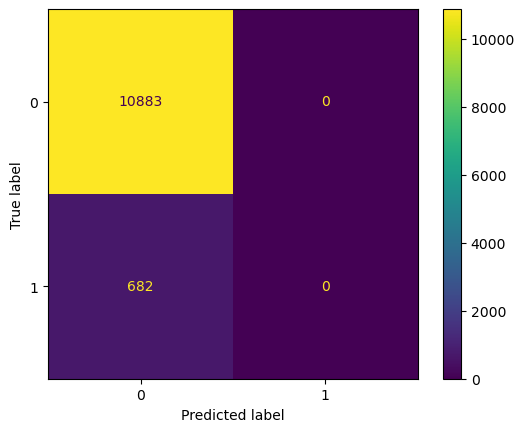

/Users/sholamicheal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)




Confusion matrix for the test set
[[3614    0]
 [ 241    0]]


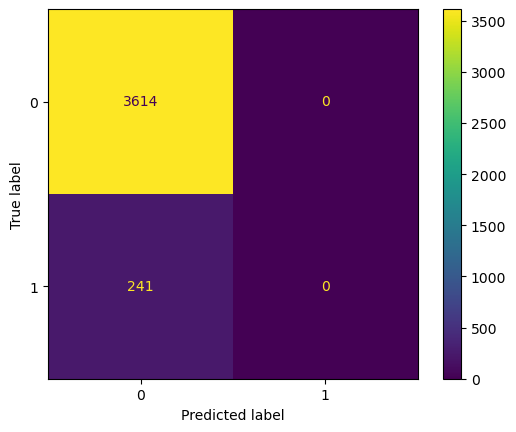

In [94]:
# Model 

log_model = LogisticRegression()

log_model.fit(X_train_scaled, y_train)

y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

In [96]:
# applying upsampling on the data and rerunning the Model

In [97]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_sm,y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

0    10883
1    10883
Name: fraudfound_p, dtype: int64

In [98]:
# standardization

std_scaler=StandardScaler().fit(X_train_sm) 

X_train_scaled=std_scaler.transform(X_train_sm)

X_test_scaled=std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.834329,0.777691
1,Precision,0.803537,0.156250
2,Recall,0.885050,0.580913


Confusion matrix for the train set
[[8528 2355]
 [1251 9632]]


/Users/sholamicheal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


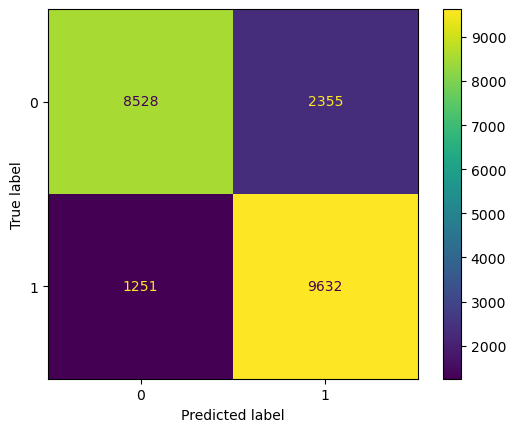



Confusion matrix for the test set
[[2858  756]
 [ 101  140]]


/Users/sholamicheal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


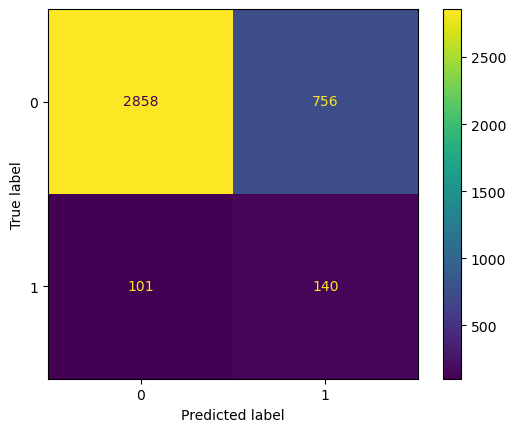

In [100]:
# Model 

log_model = LogisticRegression()

log_model.fit(X_train_scaled, y_train_sm)

y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_sm, y_pred_train_log),
                                         precision_score(y_train_sm, y_pred_train_log),
                                         recall_score(y_train_sm, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_sm,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train_sm, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

In [106]:
# downsampling using tomwlinks

from imblearn.under_sampling import TomekLinks

tl = TomekLinks() # resample only the majority class   # 'majority'
X_traintl, y_traintl = tl.fit_resample(X_train,y_train) # returns resampled data
y_traintl.value_counts() # check the distribution of resampled labels

0    10617
1      682
Name: fraudfound_p, dtype: int64

In [107]:
# standardization

std_scaler=StandardScaler().fit(X_traintl) 

X_train_scaled=std_scaler.transform(X_traintl)

X_test_scaled=std_scaler.transform(X_test)

/Users/sholamicheal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sholamicheal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.939641,0.937484
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000


Confusion matrix for the train set
[[10617     0]
 [  682     0]]


/Users/sholamicheal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


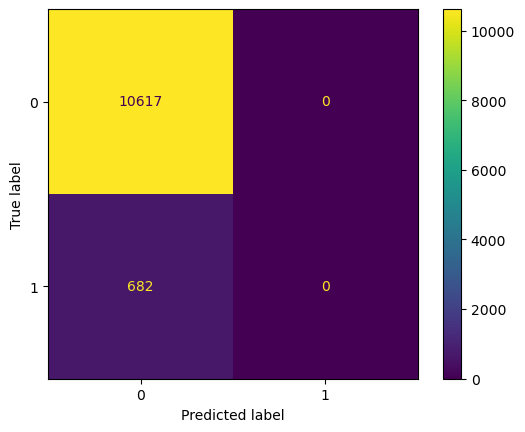



Confusion matrix for the test set
[[3614    0]
 [ 241    0]]


/Users/sholamicheal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


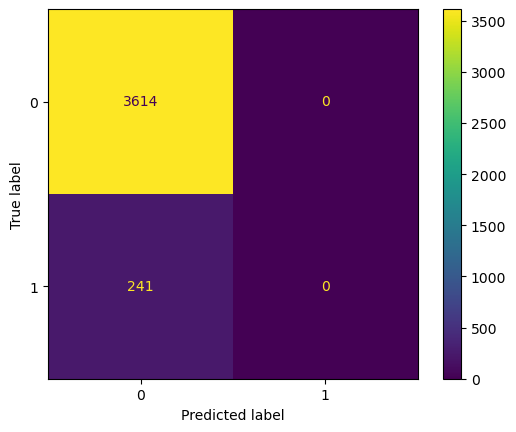

In [109]:
# Model 

log_model = LogisticRegression()

log_model.fit(X_train_scaled, y_traintl)

y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_traintl, y_pred_train_log),
                                         precision_score(y_traintl, y_pred_train_log),
                                         recall_score(y_traintl, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_traintl,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_traintl, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

In [113]:
X.columns

Index(['weekofmonth', 'weekofmonthclaimed', 'age', 'repnumber', 'deductible',
       'driverrating', 'month', 'dayofweek', 'make', 'accidentarea',
       'dayofweekclaimed', 'monthclaimed', 'sex', 'maritalstatus', 'fault',
       'policytype', 'vehiclecategory', 'vehicleprice', 'days_policy_accident',
       'days_policy_claim', 'pastnumberofclaims', 'ageofvehicle',
       'ageofpolicyholder', 'policereportfiled', 'witnesspresent', 'agenttype',
       'numberofsuppliments', 'addresschange_claim', 'numberofcars',
       'basepolicy'],
      dtype='object')

In [114]:
#varaible features
multicolin = X[['weekofmonth', 'weekofmonthclaimed', 'age', 'repnumber', 'deductible',
       'driverrating', 'month', 'dayofweek', 'make', 'accidentarea',
       'dayofweekclaimed', 'monthclaimed', 'sex', 'maritalstatus', 'fault',
       'policytype', 'vehiclecategory', 'vehicleprice', 'days_policy_accident',
       'days_policy_claim', 'pastnumberofclaims', 'ageofvehicle',
       'ageofpolicyholder', 'policereportfiled', 'witnesspresent', 'agenttype',
       'numberofsuppliments', 'addresschange_claim', 'numberofcars',
       'basepolicy']]

<AxesSubplot:>

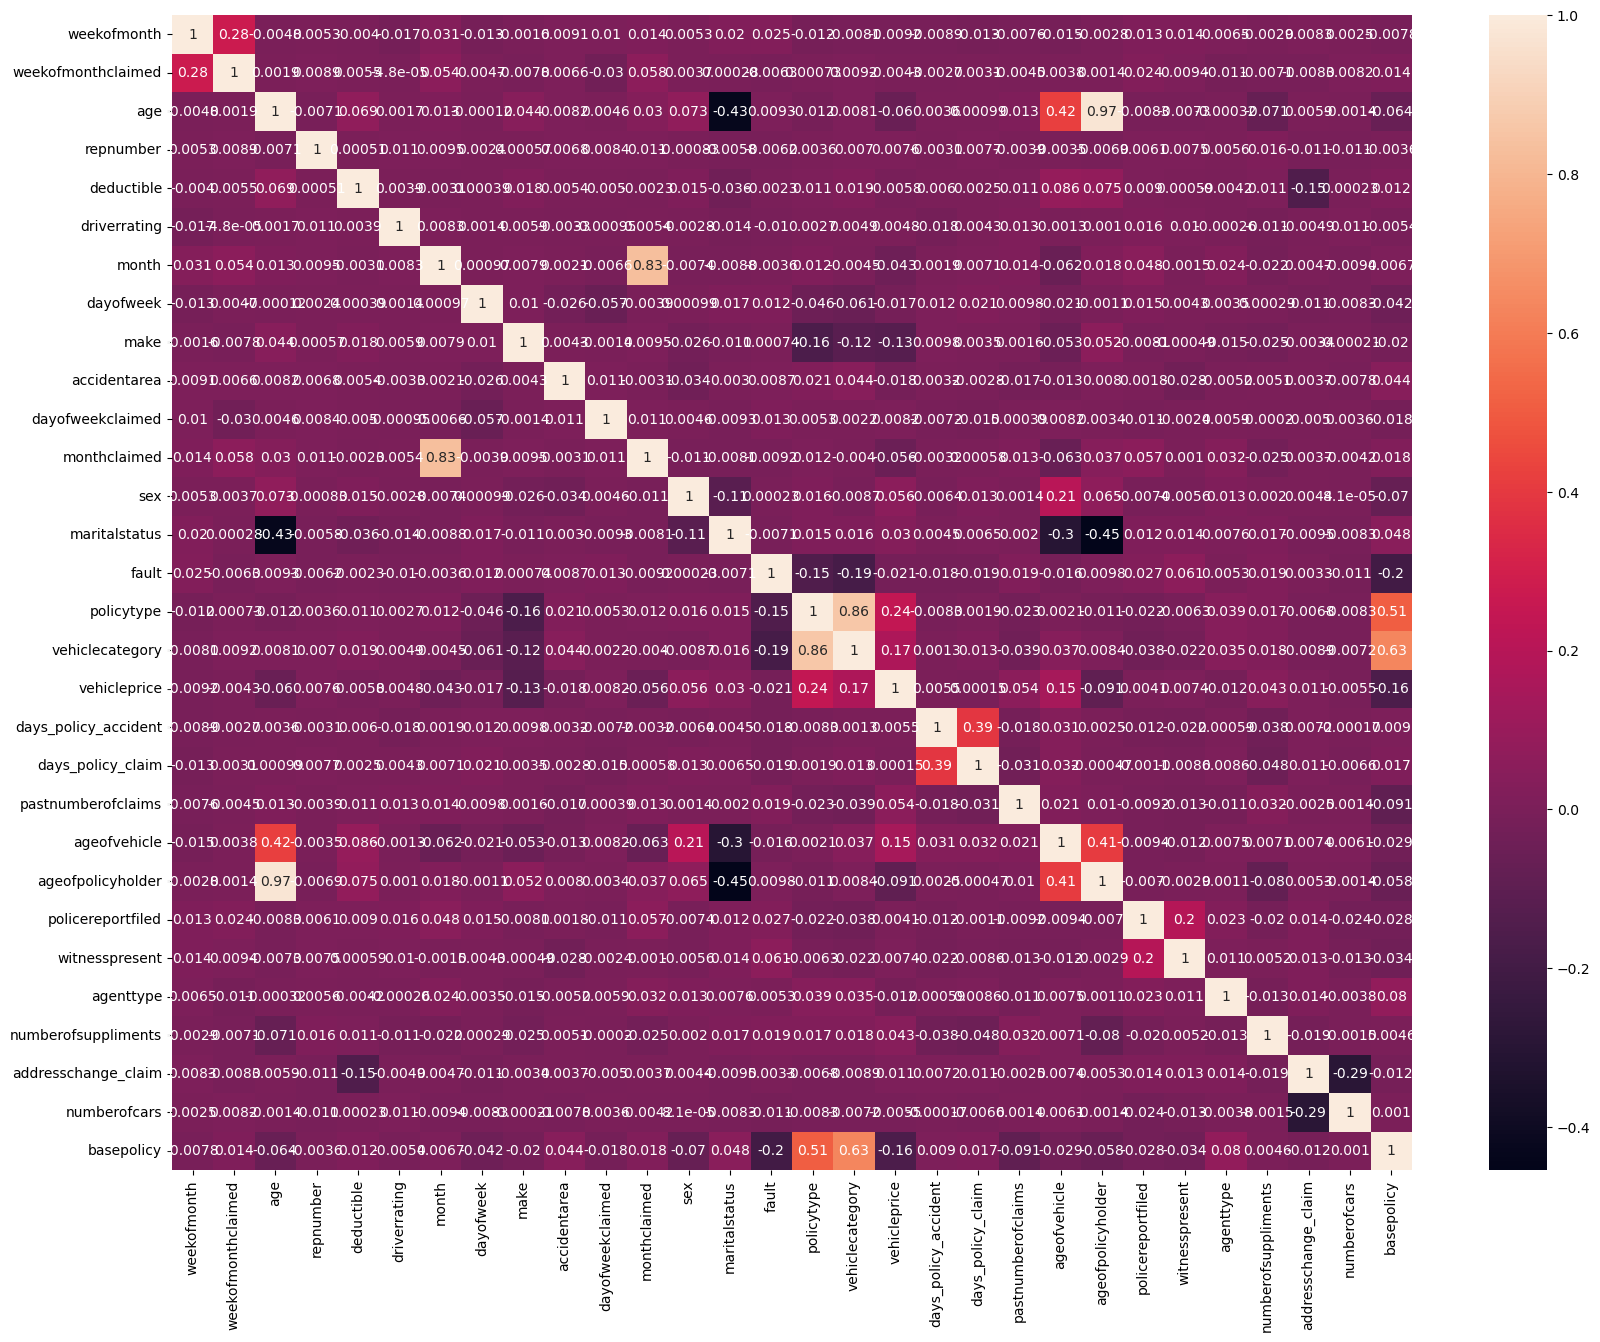

In [117]:
#1. Checking for high correlation among features.

fig=plt.figure(figsize=(20,15))
sns.heatmap(multicolin.corr(),annot=True)